<a href="https://colab.research.google.com/github/roboaleks/E.g/blob/main/project_126.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/procodingclass/Pro-M3-Hurricane-Damage-Dataset

fatal: destination path 'Pro-M3-Hurricane-Damage-Dataset' already exists and is not an empty directory.


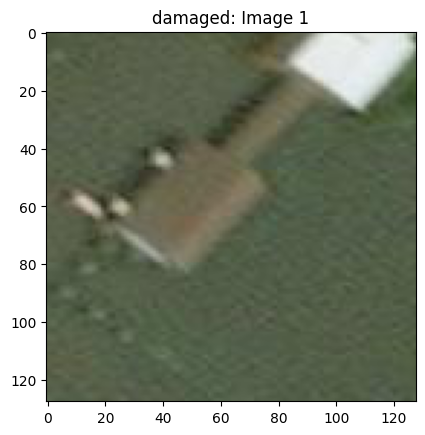

In [3]:
from matplotlib import pyplot
from matplotlib.image import imread

training_damaged_image = "/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg"

image = imread(training_damaged_image)

pyplot.title("damaged: Image 1")

pyplot.imshow(image)

pyplot.show()

In [5]:

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator(rotation_range=90, fill_mode='nearest')

training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"

training_augmented_images = training_data_generator.flow_from_directory(training_image_directory,target_size=(180,180))

Found 300 images belonging to 2 classes.


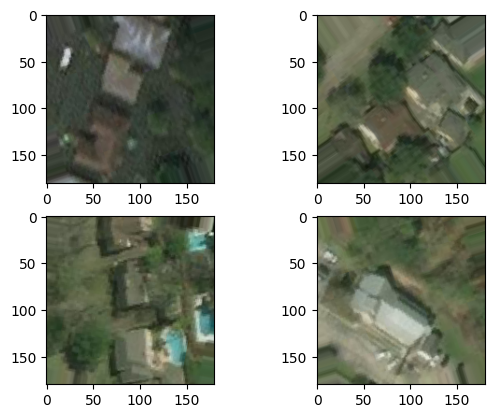

In [6]:

from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):

	pyplot.subplot(2, 2, i+1)
 
	batch = training_augmented_images.next()
 
	image = batch[0][0].astype('uint8')
 
	pyplot.imshow(image)

pyplot.show()

In [7]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_data_generator = ImageDataGenerator(zoom_range=0.3, 
                                             horizontal_flip=True, 
                                             fill_mode='nearest')

training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"

training_augmented_images = training_data_generator.flow_from_directory(
                                                       training_image_directory,
                                                       target_size=(180,180))

Found 300 images belonging to 2 classes.


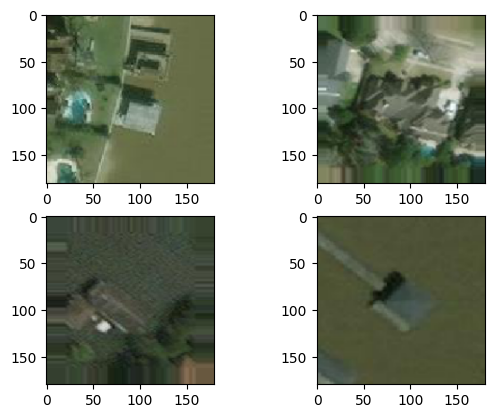

In [8]:
from matplotlib import pyplot
from matplotlib.image import imread

for i in range(4):

	pyplot.subplot(2, 2, i+1)

	batch = training_augmented_images.next()
 
	image = batch[0][0].astype('uint8')
 
	pyplot.imshow(image)

pyplot.show()

In [16]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img


training_data_generator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"

training_augmented_images = training_data_generator.flow_from_directory(
    training_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [12]:
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

validation_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/validate"

validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [13]:
training_augmented_images.class_indices

{'damage': 0, 'no_damage': 1}

In [17]:

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
])